# CNN Basics


### Target audience
Students and the general public who are interested in understanding the fundamental concepts of convolutional neural networks.

### Prerequisites
The reader should have some understanding of basic mathematical topics. In particular: 
1. vectors and matrices; 
2. boolean functions; 
3. linear equation systems; and 
4. derivatives. 

The reader should also already be familiar with the basic concepts of machine learning.

This jupyter notebook will rely on the following Python libraries:
- numpy
- Pillow
- matplotlib

If you already own these libraries you can continue with the microcredit. Please execute the next cell to install those libraries otherwise.

### Learning goals

Learning goals are mainly the concepts of CNNs and building blocks such as Layers(Conv, MaxPool, etc.)


# Table of Contents
* [Introduction](#Introduction)
* [Recap: Image representation](#Image_representation)
* [Convolutional Layer](#Convolutional_Layer)
* [Example: 2D Convolution](#Example_2D_Convolution)
* [Receptive Field](#Receptive_Field)
* [Pooling Layer](#Pooling_Layer)
* [Fully connected layer](#FC_Layer)
* [Weight Sharing](#Weight_Sharing)
* [Regularization](#Regularization)
* [Normalization](#Normalization)
* [Debugging](#Debugging)

In [ ]:
############
## RUN ME ##
############

# Installing the required libraries

! pip install numpy
! pip install Pillow
! pip install matplotlib
! pip install torch
! pip install torchsummary

# Introduction <a class="anchor" id="Introduction"></a>

**Convolutional Neural Networks** (**CNNs**) have transformed the field of computer vision, emulating the hierarchical processing of the visual cortex and enabling machines to detect, understand and extract meaningful information from images. 
Using convolutional layers, pooling operations and non-linear activation functions, CNNs excel at capturing local patterns, learning spatial hierarchies and achieving impressive accuracy in tasks such as image classification, object detection and image segmentation.

CNNs are a class of deep learning models that have proven effective in computer vision tasks such as image classification, object detection and segmentation. CNNs are particularly well suited to processing and analysing visual data because they are designed to automatically learn and extract meaningful features from input data.


## General structure and building blocks of CNNs

At a high level, a CNN consists of multiple interconnected layers, each performing specific operations to transform the input data. 
The basic building block of a CNN is - as the name already suggest - the **convolutional layer**.


Convolutional (in short: conv) layers are the key component of CNNs. 
They apply a set of learnable filters, also known as **kernels** or feature detectors, to the input data. 
Each filter performs a convolution operation by sliding across the input, computing dot products between the filter weights and **local receptive fields**. 
This operation enables the network to detect different visual patterns, such as edges, corners, and textures, at different spatial locations in the input.

Pooling layers are used to reduce the spatial dimensions of the feature maps produced by the convolutional layers. 
They achieve this by partitioning the input into non-overlapping regions and computing a summary statistic, such as the maximum value (max pooling) or average value (average pooling), within each region. 
Pooling helps to reduce the sensitivity of the network to the exact spatial location of features, making it more invariant to small translations and distortions in the input.
They also help to reduce parameters and increase the receptive field at the following layers.

In early CNN architectures especially for classification tasks, fully connected (in short: FC) layers are typically placed at the end of the network and are responsible for making the final predictions. 
These layers connect every neuron in the previous layer to every neuron in the current layer, enabling the network to learn complex relationships between the extracted features and the target output. 
The fully connected layers perform non-linear transformations and often employ activation functions, such as ReLU (Rectified Linear Unit), to introduce non-linearity into the model.
When transitioning from a convolutional layer the the fully connected layer a flattening layer is usually used to transform multi-dimensional data to one-dimensional data.

![title](images/cnn.png)

In addition to these fundamental building blocks, CNNs often include other layers and techniques to improve performance and robustness. 
A well-known additional technique is **dropout**, which randomly deactivates a fraction of neurons in a layer during training to prevent overfitting especially in fully connected layers, and batch normalization layers, which normalize the input across mini-batches to accelerate training and improve generalization. 
Furthermore, CNN architectures can be extended with **skip connections**, **residual blocks**, and **attention mechanisms** to enhance the flow of information and enable better gradient propagation.

The training process of a CNN involves feeding labeled training examples through the network, computing the output predictions, and comparing them to the ground truth labels. 
The network's parameters, including filter weights and biases, are then adjusted using optimization algorithms, such as stochastic gradient descent (SGD), to minimize the discrepancy between the predicted and actual labels. 
This process, known as backpropagation, iteratively updates the network's parameters and allows the network to learn meaningful representations from the data.

# Recap: Image representation  <a class="anchor" id="Image_representation"></a>

Before exploring the details of the building blocks of CNNs, we recap how the image data we feed into a CNN is represented. 
Though this recap is only meant to aid in the understanding of the inner workings of CNNs, a more practical view on the data representation is available in the next part of this microcredit "Introduction to Tensors". 
However, this naive recap will suffice for the moment.

In a computer, an image is represented as a collection of numbers arranged in a structured manner. 
The most common representation is using matrices or grids of numbers, where each number corresponds to a pixel in the image.

In a grayscale image, each pixel is typically represented by a single value indicating the intensity of the pixel. 
The image is represented as a 2D matrix, where each element of the matrix corresponds to the intensity value of a pixel at a specific location. 
The size of the matrix corresponds to the width and height of the image.

For example, a 5x5 grayscale image can be represented as the following matrix:

$$
\begin{bmatrix}
0 & 0 & 0 & 0 & 0 \\
0 & 127 & 127 & 127 & 0 \\
0 & 127 & 255 & 127 & 0 \\
0 & 127 & 127 & 127 & 0 \\
0 & 0 & 0 & 0 & 0 \\
\end{bmatrix}
$$

Here, each number represents the intensity ranging from 0 (black) to 255 (white). 
The matrix provides a structured representation of the image, allowing us to access and manipulate individual pixels.

In a color image, the representation becomes slightly more complex. 
Color images are typically represented using the RGB color model, where each pixel is described by three color channels: red, green, and blue. 
Each color channel is represented as a separate grayscale image, and the three channels are combined to form the full-color image.

To represent a color image as matrices, we can use three separate 2D matrices, one for each color channel. 
Each element in the matrices represents the intensity of the corresponding color channel at a specific pixel location. The size of the matrices remains the same as the width and height of the image.

For example, a 5x5 color image can be represented as three separate matrices:

$$
\begin{array}{ccc}
\begin{bmatrix}
0 & 0 & 0 & 0 & 0 \\
0 & 255 & 255 & 255 & 0 \\
0 & 255 & 0 & 255 & 0 \\
0 & 255 & 255 & 255 & 0 \\
0 & 0 & 0 & 0 & 0 \\
\end{bmatrix}
& \quad
\begin{bmatrix}
0 & 0 & 0 & 0 & 0 \\
0 & 0 & 255 & 0 & 0 \\
0 & 255 & 0 & 255 & 0 \\
0 & 0 & 255 & 0 & 0 \\
0 & 0 & 0 & 0 & 0 \\
\end{bmatrix}
& \quad
\begin{bmatrix}
0 & 0 & 0 & 0 & 0 \\
0 & 0 & 0 & 0 & 0 \\
0 & 255 & 255 & 255 & 0 \\
0 & 0 & 0 & 0 & 0 \\
0 & 0 & 0 & 0 & 0 \\
\end{bmatrix}
\end{array}
$$

# Convolutional Layer  <a class="anchor" id="Convolutional_Layer"></a>

A convolution layer in a neural network applies a set of learnable filters (kernels) to the input data (usually an 2D image).
Each filter is a small matrix that "slides" over the input data, performs element-wise multiplications, and accumulates the results into a single output value.

This operation is called **dot product**, and it effectively detects a specific feature in the input data.
By using multiple filters and repeating this operation at different positions, a convolution layer can extract a wide range of features from the input data. 
This is particularly useful for image processing, where the same features (e.g., edges, textures, patterns) may appear at different locations and scales in the image.

Before we dive into the convolutional layer fully, we first have to solidify some basic concepts.


## Convolution
Convolution (or short: Conv) is a mathematical operation that is formally defined as follows:

Given two functions $f(t)$ and $g(t)$, their convolution is:

$$(f * g)(t) = \int_{-\infty}^{\infty} f(\tau)g(t - \tau) d\tau$$

In the context of image processing, $f$ and $g$ represent the input image ($I$) and the kernel ($K$).

The convolution operation can be expressed as:

$$(I * K)(i, j) = \sum_{x=-a}^{a}\sum_{y=-b}^{b} K(x+a, y+b) I(i-x+a, j-y+b)$$

$(i, j)$ are the indices of a pixel in the output image $(I * K)$, $(x, y)$ are the indices of a pixel in the kernel and $(a, b)$ are the center indices of the kernel.

The result of this operation, since $I$ and $K$ are matrices, is also a matrix. 
And while we can represent a matrix also as an image, the result is also an image. 
In this case, the resulting image is usually referred to as a **feature map**.

<img src="images/simple_convolution.png" alt="Simple convolution" width="450">

The result of the dot product is a single scalar $c$, namely:

$$c = 1a + 2b + 3c + 6d + 7e + 8f + 11g + 12h + 13i$$


### Feature map

In CNNs, a feature map is the output of a convolutional layer operation representing specific features in the input image or in *another* (the preceding) feature map, since the output of a convolutional layer is used as input to the subsequent convolutional layer.

<img src="images/feature_map.png" alt="Feature map" width="600">

During the forward pass of a CNN, the input image is convolved with one (or more) kernels to produce one (or multiple) feature maps. 
Each feature map corresponds to a specific kernel and represents the response of that kernel to the input data.
Each element in the feature map represents the activation of a specific neuron in the network, and its value represents the degree to which the corresponding feature is present in the input data at the corresponding location.

**Note**: the term "feature map" is also often called activation map or outputs.


### Kernel

A kernel (also often referred to as _feature detector_, _filter_ or _convolutional filter_) is a small matrix of weights that is applied to the input data during the convolutional operation.
The kernel plays a crucial role in CNNs as it captures specific patterns or features from the input data.

It is typically a rectangular matrix with smaller dimensions than the input, such as 3x3, 5x5 or 7x7. 
A special kernel is the 1x1 kernel, which is used in a so called "1-Convolution" or "1x1-Convolution". 

$$
\begin{array}{ccc}
\begin{bmatrix}
1 \\
\end{bmatrix}
& \quad
\begin{bmatrix}
1 & 0 & -1 \\
2 & 0 & -2 \\
1 & 0 & -1 \\
\end{bmatrix}
& \quad
\begin{bmatrix}
0 & 1 & 0 & -1 & 0 \\
0 & 2 & 0 & -2 & 0 \\
0 & 3 & 0 & -3 & 0 \\
0 & 2 & 0 & -2 & 0 \\
0 & 1 & 0 & -1 & 0 \\
\end{bmatrix}
& \quad
\begin{bmatrix}
1 & 1 \\
1 & 1 \\
\end{bmatrix}
& \quad
\end{array}
$$

Generally, odd-sized kernels are used, however, even-sized kernels are also available - though they have their own applications and characteristics.
For now, we will focus on odd-sized kernels solely.

During the convolution operation, the kernel is applied to the input data by "sliding" it over the entire input.
At each position an elementwise multiplication is performed between the kernel and the corresponding value of the input.

### Weight Sharing <a class="anchor" id="Weight_Sharing"></a>

Weight sharing is a fundamental concept in Convolutional Neural Networks (CNNs).
The same set of learnable parameters (weights and biases) is used across multiple locations in the input data.
Convolutional layers apply a small filter (kernel) to the input data and share the same filter across different positions.

This sharing of weights allows CNNs to automatically detect local patterns, such as edges or textures, regardless of their location in the input data.

Weight sharing significantly reduces the number of parameters in the network, making CNNs efficient and effective for tasks like image recognition and object detection.
It enables CNNs to capture translational invariance, meaning they can recognize patterns regardless of their position in the image.
Weight sharing is a key reason why CNNs excel in processing and understanding visual data, as it helps them generalize well to variations in the input.


### Stride

The movement of the kernel, which we referred to as "sliding", is controlled by the stride.
Stride is a parameter used in CNNs to determine the step size by which the kernel is moved horizontally or vertically after each calculation of a dot-product to compute the next dot-product at the next position of the input data.

A stride of 1 means that the kernel is shifted by one pixel between successive calculations, while a stride of 2 means the kernel is moved 2 pixels, i.e., thus calculating dot-products at every second possible position.

The following animation shows the effects of different stride values.

<img src="images/stride123.gif" alt="Stride" width="800">

A stride of 1 will "visit" every pixel in our input data, one at a time.
However, as you can see in the examples for stride 2 and stride 3, the kernel would eventually "jump" out of the boundaries of our input.
This is problematic, for two reasons: the kernel is not allowed to be "out-of-bounds" and because of this, the kernel will basically stop at the very last possible location in our input data (as far as the stride allows) and capture only the information from its last position.
This becomes worse, if our kernel has bigger dimensions - in the worst case, the kernel wouldn't even fit.

This means the kernel will ultimately miss some information in the input for the generated output - to fix this behaviour we utilize a technique called **padding**.


### Padding

When a kernel is applied to the input, it moves across it in a sliding window fashion. 
Without padding, the output feature map will be smaller than the input, as the kernel cannot extend beyond the boundaries of the input.

<img src="images/size.gif" alt="Padding" width="500">


As you can see in the animation our original image with the dimensions 4x4 is reduced by the convolution to the dimensions 2x2.

Padding helps address this issue by adding additional pixels around the input. 
The most common type of padding is zero-padding, where zeros are added as extra rows and columns. 
With padding it can be achieved that the spatial dimensions of the output feature map match those of the input.

<img src="images/padding.png" alt="Padding" width="300">


To this end, padding of the following size has to be applied to the input:

$$padding = ((size_{output} - 1) * stride + size_{kernel} - size_{input}) / 2 $$

<!--The following animation shows the application of padding. Compare it to 'faulty' animation of the stride.-->

<!-- 2D Convolution -->
# Example: 2D Convolution <a class="anchor" id="Example_2D_Convolution"></a>

Let's consider a simple example of performing a 2D convolution operation on a 5x5 image using a 3x3 kernel without padding and a stride of 1.

Our image:

$$
\begin{bmatrix}
 1 &  2 &  3 &  4 &  5 \\
 6 &  7 &  8 &  1 & 10 \\
11 & 12 & 13 & 14 & 15 \\
16 & 17 & 18 & 19 & 20 \\
21 & 22 & 23 & 24 & 25 \\
\end{bmatrix}
$$

And the kernel:

$$
\begin{bmatrix}
1 & 0 & -1 \\
2 & 0 & -2 \\
1 & 0 & -1\\
\end{bmatrix}
$$

To perform the convolution, we slide the kernel over the image and perform element-wise multiplications and summations.
The kernel starts at the top-left corner of the image and moves by one step (stride of 1) horizontally and vertically.

Think of it as aligning the top-left corner of the kernel with the top-left corner of the image.
This way the the kernel covers exactly six elements of our image, namely the elements $1, 2, 3, 6, 7, 8, 11, 12, 13$. 

Let's calculate the output of the convolution for the top-left corner of the image.
By elementwise multiplication and summation we get:

$$(1*1) + (2*2) + (3*1) +
(6*0) + (7*0) + (8*0) +
(11*(-1)) + (12*(-2)) + (13*(-1)) = -9$$


The following cell has a simple hands-on example of how convolution works.
Simply run the cell and check the output.

In [1]:
############
## RUN ME ##
############

import numpy
import matplotlib.pyplot as plt

from utils import convolve, get_image


input_data = get_image(generated=False, scale=2)

kernel = numpy.array([
    [1,  0,  -1],
    [2,  0,  -2],
    [1,  0,  -1]
])

# Perform the convolution
output_data = convolve(input_data, kernel, True)

# Plot
fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.imshow(input_data, cmap='gray')
ax1.set_title('Input Image')
ax2.imshow(output_data, cmap='gray')
ax2.set_title('Output Image')
plt.show()

# Receptive Field <a class="anchor" id="Receptive_Field"></a>

In Convolutional Neural Networks (CNNs), the term "receptive field" refers to the region of the input image that a particular neuron in a layer is sensitive to. 
In other words, it's the area in the input data that influences the value of a specific neuron in the network.
In the initial layers of a CNN, each neuron is connected to a small region or patch of the input image.
This small region is known as the "receptive field." 
Neurons in these layers are responsible for capturing simple features like edges, corners, and textures within this region.
As you move deeper into the network, neurons have a larger receptive field. This means they consider information from a broader area of the input image. Neurons in deeper layers can capture more complex and abstract features, such as object parts or entire objects.

The concept of receptive fields is crucial in CNNs for several reasons:

- It helps create a feature hierarchy where lower layers capture simple features and higher layers learn complex patterns by aggregating information from lower layers.

- It allows CNNs to understand the spatial hierarchy of objects in an image. Neurons in earlier layers focus on local details, while neurons in later layers focus on more global structures.

- It aids in object localization. When a CNN "identifies" an object, it can also determine its location within the image based on the receptive fields of the neurons that activate.



# Pooling Layer <a class="anchor" id="Pooling_Layer"></a>

Pooling is a common operation used in convolutional neural networks (CNNs) for down-sampling or reducing the spatial dimensions of an input feature map. 
It helps to extract the most important features while reducing the computational complexity of the network.


![title](images/pooling.gif)

The following cell has a simple hands-on example of how pooling works.
Simply run the cell and check the output.
Note how the spatial dimensions of the image change after max pooling was applied.

DEBUG:PIL.PngImagePlugin:STREAM b'IHDR' 16 13
DEBUG:PIL.PngImagePlugin:STREAM b'iCCP' 41 388
DEBUG:PIL.PngImagePlugin:iCCP profile name b'ICC profile'
DEBUG:PIL.PngImagePlugin:Compression method 0
DEBUG:PIL.PngImagePlugin:STREAM b'bKGD' 441 6
DEBUG:PIL.PngImagePlugin:b'bKGD' 441 6 (unknown)
DEBUG:PIL.PngImagePlugin:STREAM b'pHYs' 459 9
DEBUG:PIL.PngImagePlugin:STREAM b'tIME' 480 7
DEBUG:PIL.PngImagePlugin:b'tIME' 480 7 (unknown)
DEBUG:PIL.PngImagePlugin:STREAM b'tEXt' 499 25
DEBUG:PIL.PngImagePlugin:STREAM b'IDAT' 536 1091


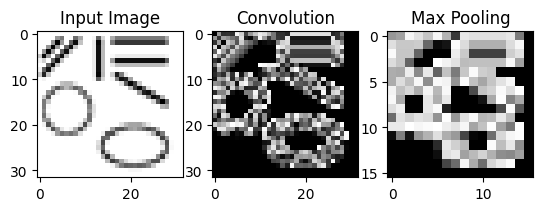

In [9]:
############
## RUN ME ##
############

import numpy as np
import matplotlib.pyplot as plt

from utils import convolve, get_image

input_data = get_image(False, 25)

# Filter kernel
SOBEL = np.array([
    [-1, -2, -1],
    [ 0,  0,  0],
    [ 1,  2,  1]
])

convolved_data = convolve(input_data, SOBEL, True)

# Define pooling size
pool_size = 2

# Define stride
stride = 2

# Compute the output shape
input_shape = convolved_data.shape
output_shape = (
    (input_shape[0] - pool_size) // stride + 1,
    (input_shape[1] - pool_size) // stride + 1
)

# Initialize the output
output_data = np.zeros(output_shape)

# Perform max pooling
for i in range(output_shape[0]):
    for j in range(output_shape[1]):
        output_data[i, j] = np.max(convolved_data[
            i * stride:i * stride + pool_size,
            j * stride:j * stride + pool_size
        ])

# Plot the input and output images side by side
fig, (ax1, ax2, ax3) = plt.subplots(1, 3)
ax1.imshow(input_data, cmap='gray')
ax1.set_title('Input Image')
ax2.imshow(convolved_data, cmap='gray')
ax2.set_title('Convolution')
ax3.imshow(output_data, cmap='gray')
ax3.set_title('Max Pooling')
plt.show()

# Fully connected layer <a class="anchor" id="FC_Layer"></a>
Fully connected (FC) layers, also known as dense layers, play a crucial role in early CNN architectures.

After convolutional and pooling layers process the input data (e.g., an image), the resulting feature maps are often flattened into a one-dimensional vector.
This vector is then fed into one or more fully connected layers.
Each neuron in a fully connected layer is connected to every neuron in the previous layer, similar to a traditional neural network.
Fully connected layers have a large number of parameters, allowing them to capture complex relationships in the data.

Fully connected layers are typically used in the final layers of a CNN, where they combine and process high-level features extracted from earlier layers.
They are crucial for classification tasks. For example, in image classification, fully connected layers make the final decision about which category an image belongs to.

Each neuron in a fully connected layer applies an activation function (e.g., ReLU or softmax) to introduce non-linearity into the model and enable it to learn complex patterns and make predictions.

The number of fully connected layers in a CNN can vary. 
Smaller CNNs may have just one or two fully connected layers, while deeper architectures might include more.

A FC layer is basically a Multi-Layer Perceptron (MLP). For more information regarding MLPs, refer to the corresponding microcredit.

# Regularization <a class="anchor" id="Regularization"></a>

Regularization is a crucial technique in the field of deep learning that aims to prevent overfitting and enhance the generalization ability of neural networks. In the context of deep learning models, overfitting occurs when a network learns to perform exceptionally well on the training data but fails to generalize effectively to new, unseen data. Regularization methods help to mitigate this issue by adding constraints or penalties to the learning process, discouraging the model from becoming too complex and overly specialized to the training data.

There are various regularization techniques employed in deep learning, and two commonly used methods are L1 regularization and L2 regularization. These techniques introduce additional terms to the loss function during training, influencing the optimization process.

For a short overview, refer to these regularization techniques:

- L1 norm
- L2 norm
- Dropout
- Early stopping


# Normalization <a class="anchor" id="Normalization"></a>

Normalization is a pre-processing technique used to standardize data.
In other words, having different sources of data inside the same range. 
Not normalizing the data before training can cause problems in our network, making it drastically harder to train and decrease its learning speed.

For example, imagine we have a car rental service. 
Firstly, we want to predict a fair price for each car based on competitors’ data. 
We have two features per car: the age in years and the total amount of kilometers it has been driven for. These can have very different ranges, ranging from 0 to 30 years, while distance could go from 0 up to hundreds of thousands of kilometers. 
We don’t want features to have these differences in ranges, as the value with the higher range might bias our models into giving them inflated importance.

There are two main methods to normalize our data. 
The most straightforward method is to scale it to a range from 0 to 1:

$$x_{normalized}=\frac{x - m}{x_{max} - x_{min}} $$

with $x$ being the data point to normalize, $m$ the mean of the data set, $x_{max}$ the highest value, and $x_{min}$ the lowest value. 
This technique is generally used on the inputs of the data. 
The non-normalized data points with wide ranges can cause instability in Neural Networks. 
The relatively large inputs can cascade down to the layers, causing problems such as exploding gradients.

The other technique used to normalize data is forcing the data points to have a mean of $0$ and a standard deviation of  1, using the following formula:

$$ x_{normalized}=\frac{x - m}{s} $$

with $x$ being the data point to normalize, $m$ the mean of the data set, and $s$ the standard deviation of the data set.
Now, each data point mimics a standard normal distribution. 
Having all the features on this scale, none of them will have a bias, and therefore, our models will learn better.

## Batch Normalization

Batch Normalization, or BN, addresses internal covariate shift in neural networks. This phenomenon occurs when the distribution of inputs to each layer changes during training, leading to slower convergence and instability.

BN normalizes layer activations across mini-batches during training, simplifying the process. 
To achieve normalization, the batch mean is subtracted and then divided by the batch standard deviation. 
This ensures that the activations are centered around zero and have a standard deviation of one.

Batch Normalization helps to stabilize the distribution of activations, making it possible to train deeper networks more effectively. It also solves the problem of vanishing and exploding gradients, leading to faster convergence and improved generalization. Furthermore, it serves as a regularizer, decreasing the need for dropout and other forms of regularization.

For more information regarding Batch Normalization, refer to the original paper **Batch Normalization: Accelerating Deep Network Training by Reducing Internal Covariate Shift**.

# Debugging <a class="anchor" id="Debugging"></a>

## Debugging with the IDE

[Google](https://www.google.com) it yourself, there are many well written tutorials (and YouTube videos) out there how debugging is done properly.
As a starting point, here is a [good tutorial](https://www.jetbrains.com/help/pycharm/part-1-debugging-python-code.html)  about debugging in PyCharm.
There might be other tutorials for other IDEs. 

## Debugging (technical aspects)

Please note that debugging the `learning phase` is different than debugging just the technical aspects. Here we focus only on the technical aspects, i.e. implementation details.

In [2]:
############
## RUN ME ##
############

# Defining a sample architecture

import torch

class BoringModule(torch.nn.Module):
    """ A boring module for debugging. """
    def __init__(self) -> None:
        super().__init__()
        
        self.in_channels = 1  # 1 Channel -> grayscale images
        self.spatial_dimensions = 2  # 2 = 2D -> images, 3 = 3D -> volumes
        self.num_classes = 2  # n = 2 = two-class (binary), n > 2 = multi-class
        
        conv_type = torch.nn.Conv2d if self.spatial_dimensions == 2 else torch.nn.Conv3d
        
        self.layers = torch.nn.Sequential(
            conv_type(
                in_channels = self.in_channels,
                out_channels = 3,
                kernel_size = 3,
                stride = 2,
                padding = 1 
            ),
            torch.nn.ReLU(inplace=True),
            conv_type(
                in_channels = 3,
                out_channels = 32,
                kernel_size = 3,
                stride = 2,
                padding = 1
            ),
            torch.nn.ReLU(inplace=True),
            conv_type(
                in_channels = 32,
                out_channels = 64,
                kernel_size = 3,
                stride = 2,
                padding = 1            
            ),
            torch.nn.ReLU(inplace=True),
            torch.nn.Flatten()
        )
    
    def forward(self, x: torch.Tensor) -> torch.Tensor:
        return self.layers(x)

## Getting an overview of the architecture

In [3]:
############
## RUN ME ##
############

# Defining our test data

batch_size = 2
n_channels = 1
width = 64
height = 64
depth = 64

# Simple Overview

boring_module = BoringModule()

print(boring_module)

BoringModule(
  (layers): Sequential(
    (0): Conv2d(1, 3, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
    (5): ReLU(inplace=True)
    (6): Flatten(start_dim=1, end_dim=-1)
  )
)


## Final layer output shape

In [4]:
############
## RUN ME ##
############

boring_module = BoringModule()

x = torch.rand((batch_size, n_channels, width, height))  # Batchsize = 2, Channels = 1, Height = 60, Width = 50

for module in boring_module.children():
    x = module(x)
    print(module, x, x.shape)  # Should be dimensions [2, 4096], with 4096 the final layer size

Sequential(
  (0): Conv2d(1, 3, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
  (1): ReLU(inplace=True)
  (2): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
  (3): ReLU(inplace=True)
  (4): Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
  (5): ReLU(inplace=True)
  (6): Flatten(start_dim=1, end_dim=-1)
) tensor([[0.0251, 0.0215, 0.0055,  ..., 0.0000, 0.0000, 0.0000],
        [0.0277, 0.0149, 0.0189,  ..., 0.0000, 0.0000, 0.0000]],
       grad_fn=<ReshapeAliasBackward0>) torch.Size([2, 4096])


## One-liners with libraries

In [5]:
############
## RUN ME ##
############

from torchsummary import summary

boring_module = BoringModule()

summary(boring_module, input_size=(n_channels, width, height))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1            [-1, 3, 32, 32]              30
              ReLU-2            [-1, 3, 32, 32]               0
            Conv2d-3           [-1, 32, 16, 16]             896
              ReLU-4           [-1, 32, 16, 16]               0
            Conv2d-5             [-1, 64, 8, 8]          18,496
              ReLU-6             [-1, 64, 8, 8]               0
           Flatten-7                 [-1, 4096]               0
Total params: 19,422
Trainable params: 19,422
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.02
Forward/backward pass size (MB): 0.27
Params size (MB): 0.07
Estimated Total Size (MB): 0.36
----------------------------------------------------------------


# References

Goodfellow et al., "Deep Learning", 2016.

Srivastava et al., "Dropout: a simple way to prevent neural networks from overfitting", 2014

Ioffe et al, "Batch Normalization: Accelerating Deep Network Training by Reducing Internal Covariate Shift", 2015

<!--He et al, "Deep Residual Learning for Image Recognition", 2015-->

Raskutti et all., "Early stopping and non-parametric regression: An optimal data-dependent stopping rule", 2013

Images by C. Adolph